# Iris DataSet

In [1]:
!pip install fcapy[all]
!pip install frozendict
!pip install ipynb
!pip install sparselinear
!pip install bitsets
!pip install bitarray
import torch
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git
import numpy as np
import pandas as pd

Looking in links: https://data.pyg.org/whl/torch-2.0.0+cuda118.html
  Using cached torch_scatter-2.1.2.tar.gz (108 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for torch-scatter: filename=torch_scatter-2.1.2-cp310-cp310-linux_x86_64.whl size=495091 sha256=33379ab18628b65c1658c17f9601a1c4849df238a26f0e2d73267ecde7af1d6a
  Stored in directory: /root/.cache/pip/wheels/92/f1/2b/3b46d54b134259f58c8363568569053248040859b1a145b3ce
Successfully built torch-scatter
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cuda118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-sparse: filename=torch_sparse-0.6.18-cp310-cp310-linux_x86_64.whl size=1035675 sha256=9f4d4f50c8a691c371aded05d8b730e97e1113f76bc625fa1d967684b4d953da
  Stored in directory: /root/.cache/pip/wheels/c9/dd/0f/a6a16f9f3b0236733d257b4b4ea91b548b984a341ed3b8f38c
Successfully built torch-sparse
Looking in links

In [2]:
from fcapy.context import FormalContext
from fcapy.lattice import ConceptLattice
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, accuracy_score, classification_report


In [3]:
from fcapy.visualizer import LineVizNx
import matplotlib.pyplot as plt

plt.rcParams['figure.facecolor'] = (1,1,1,1)

In [4]:
import neural_lib as nl

In [7]:
df = pd.read_csv('/content/sample_data/IRIS.csv')
df.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [8]:
# Создание нового DataFrame для бинаризированных данных
df_bin = pd.DataFrame()
# Бинаризация 'sepal_length'
step = 0.5
start, finish = df['sepal_length'].min(), df['sepal_length'].max()
for i in np.arange(start, finish, step):
    df_bin[f'sepal_length({i}, {i+step})'] = df['sepal_length'].between(i, i+step, inclusive='left')

# Бинаризация 'sepal_width'
step = 0.5
start, finish = df['sepal_width'].min(), df['sepal_width'].max()
for i in np.arange(start, finish, step):
    df_bin[f'sepal_width({i}, {i+step})'] = df['sepal_width'].between(i, i+step, inclusive='left')
# Бинаризация 'petal_length'
step = 0.5
start, finish = df['petal_length'].min(), df['petal_length'].max()
for i in np.arange(start, finish, step):
    df_bin[f'petal_length({i}, {i+step})'] = df['petal_length'].between(i, i+step, inclusive='left')
# Бинаризация 'petal_width'
step = 0.5
start, finish = df['petal_width'].min(), df['petal_width'].max()
for i in np.arange(start, finish, step):
    df_bin[f'petal_width({i}, {i+step})'] = df['petal_width'].between(i, i+step, inclusive='left')
# Добавление целевой переменной
df_bin['species'] = df['species']

# Добавление идентификаторов
df_bin['sample_id'] = ['iris_' + str(i) for i in range(df_bin.shape[0])]
df_bin.set_index('sample_id', inplace=True)
df_bin['is_setosa'] = df_bin['species'] == 'Iris-setosa'
df_bin.drop('species', axis=1, inplace=True)
# Просмотр результатов
df_bin

sepal_length(4.3, 4.8)  sepal_length(4.8, 5.3)  \
sample_id                                                   
iris_0                      False                    True   
iris_1                      False                    True   
iris_2                       True                   False   
iris_3                       True                   False   
iris_4                      False                    True   
...                           ...                     ...   
iris_145                    False                   False   
iris_146                    False                   False   
iris_147                    False                   False   
iris_148                    False                   False   
iris_149                    False                   False   

           sepal_length(5.3, 5.8)  sepal_length(5.8, 6.3)  \
sample_id                                                   
iris_0                      False                   False   
iris_1                      False                   False   
iris_2                      False                   False   
iris_3                      False                   False   
iris_4                      False                   False   
...                           ...                     ...   
iris_145                    False                   False   
iris_146                    False                   False   
iris_147                    False                   False   
iris_148                    False                    True   
iris_149                    False                    True   

           sepal_length(6.3, 6.8)  sepal_length(6.8, 7.3)  \
sample_id                                                   
iris_0                      False                   False   
iris_1                      False                   False   
iris_2                      False                   False   
iris_3                      False                   False   
iris_4                      False                   False   
...                           ...                     ...   
iris_145                     True                   False   
iris_146                     True                   False   
iris_147                     True                   False   
iris_148                    False                   False   
iris_149                    False                   False   

           sepal_length(7.3, 7.8)  sepal_length(7.8, 8.3)  \
sample_id                                                   
iris_0                      False                   False   
iris_1                      False                   False   
iris_2                      False                   False   
iris_3                      False                   False   
iris_4                      False                   False   
...                           ...                     ...   
iris_145                    False                   False   
iris_146                    False                   False   
iris_147                    False                   False   
iris_148                    False                   False   
iris_149                    False                   False   

           sepal_width(2.0, 2.5)  sepal_width(2.5, 3.0)  ...  \
sample_id                                                ...   
iris_0                     False                  False  ...   
iris_1                     False                  False  ...   
iris_2                     False                  False  ...   
iris_3                     False                  False  ...   
iris_4                     False                  False  ...   
...                          ...                    ...  ...   
iris_145                   False                  False  ...   
iris_146                   False                   True  ...   
iris_147                   False                  False  ...   
iris_148                   False                  False  ...   
iris_149                   False                  False  ...   

  

Split the data to train and test

In [9]:
y_feat = 'is_setosa'
df_train, df_test = train_test_split(df_bin, train_size=0.7, random_state=0)
X_train, y_train = df_train.drop(y_feat, axis=1), df_train[y_feat]
X_test, y_test = df_test.drop(y_feat, axis=1), df_test[y_feat]
X_train.describe()

sepal_length(4.3, 4.8) sepal_length(4.8, 5.3) sepal_length(5.3, 5.8)  \
count                     105                    105                    105   
unique                      2                      2                      2   
top                     False                  False                  False   
freq                       97                     82                     85   

       sepal_length(5.8, 6.3) sepal_length(6.3, 6.8) sepal_length(6.8, 7.3)  \
count                     105                    105                    105   
unique                      2                      2                      2   
top                     False                  False                  False   
freq                       92                     80                     96   

       sepal_length(7.3, 7.8) sepal_length(7.8, 8.3) sepal_width(2.0, 2.5)  \
count                     105                    105                   105   
unique                      2                      2                     2   
top                     False                  False                 False   
freq                       99                    104                    96   

       sepal_width(2.5, 3.0)  ... petal_length(4.5, 5.0)  \
count                    105  ...                    105   
unique                     2  ...                      2   
top                    False  ...                  False   
freq                      77  ...                     92   

       petal_length(5.0, 5.5) petal_length(5.5, 6.0) petal_length(6.0, 6.5)  \
count                     105                    105                    105   
unique                      2                      2                      2   
top                     False                  False                  False   
freq                       90                     92                    100   

       petal_length(6.5, 7.0) petal_width(0.1, 0.6) petal_width(0.6, 1.1)  \
count                     105                   105                   105   
unique                      2                     2                     2   
top                     False                 False                 False   
freq                      101                    71                   100   

       petal_width(1.1, 1.6) petal_width(1.6, 2.1) petal_width(2.1, 2.6)  
count                    105                   105                   105  
unique                     2                     2                     2  
top                    False                 False                 False  
freq                      80                    82                    87  

[4 rows x 30 columns]

In [10]:
X_test.describe()

sepal_length(4.3, 4.8) sepal_length(4.8, 5.3) sepal_length(5.3, 5.8)  \
count                      45                     45                     45   
unique                      2                      2                      2   
top                     False                  False                  False   
freq                       42                     34                     37   

       sepal_length(5.8, 6.3) sepal_length(6.3, 6.8) sepal_length(6.8, 7.3)  \
count                      45                     45                     45   
unique                      2                      2                      2   
top                     False                  False                  False   
freq                       32                     39                     42   

       sepal_length(7.3, 7.8) sepal_length(7.8, 8.3) sepal_width(2.0, 2.5)  \
count                      45                     45                    45   
unique                      2                      1                     2   
top                     False                  False                 False   
freq                       44                     45                    43   

       sepal_width(2.5, 3.0)  ... petal_length(4.5, 5.0)  \
count                     45  ...                     45   
unique                     2  ...                      2   
top                    False  ...                  False   
freq                      27  ...                     33   

       petal_length(5.0, 5.5) petal_length(5.5, 6.0) petal_length(6.0, 6.5)  \
count                      45                     45                     45   
unique                      2                      2                      2   
top                     False                  False                  False   
freq                       42                     41                     43   

       petal_length(6.5, 7.0) petal_width(0.1, 0.6) petal_width(0.6, 1.1)  \
count                      45                    45                    45   
unique                      1                     2                     2   
top                     False                 False                 False   
freq                       45                    30                    42   

       petal_width(1.1, 1.6) petal_width(1.6, 2.1) petal_width(2.1, 2.6)  
count                     45                    45                    45  
unique                     2                     2                     2  
top                    False                 False                 False  
freq                      29                    39                    40  

[4 rows x 30 columns]

## Step 1. Build Monotone Concept Lattice

Put binarized data in FormalContext and compute monotone ConceptLattice

In [11]:
# Create a Formal Context from the training data
K_train = FormalContext.from_pandas(X_train)

# Print the Formal Context
K_train

FormalContext (105 objects, 30 attributes, 420 connections)
        |sepal_length(4.3, 4.8)|sepal_length(4.8, 5.3)|sepal_length(5.3, 5.8)|sepal_length(5.8, 6.3)|sepal_length(6.3, 6.8)|...|petal_width(0.1, 0.6)|petal_width(0.6, 1.1)|petal_width(1.1, 1.6)|petal_width(1.6, 2.1)|petal_width(2.1, 2.6)|
iris_60 |                      |                     X|                      |                      |                      |...|                     |                    X|                     |                     |                     |
iris_116|                      |                      |                      |                      |                     X|...|                     |                     |                     |                    X|                     |
iris_144|                      |                      |                      |                      |                     X|...|                     |                     |                     |                     |       

In [15]:
L = ConceptLattice.from_context(K_train, algo = 'Sofia', is_monotone=True)
len(L)

102

Compute F1 score for each formal concept  (assuming that an object is predicted True if it is in the extent of the concept)

In [26]:
for c in L:
    y_preds = np.zeros(K_train.n_objects)
    y_preds[list(c.extent_i)] = 1
    c.measures['f1_score'] = f1_score(y_train, y_preds)


Select indices of the best concepts from the lattice

In [32]:
concepts_count = 20
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:concepts_count])

assert len({g_i for c in L[best_concepts] for g_i in c.extent_i})==K_train.n_objects, "Selected concepts do not cover all train objects"


Construct neural network based on concept lattice

In [33]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))



Setup visuzalier for the architecture

In [34]:
vis = LineVizNx(node_label_font_size=14, node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n')

Move the nodes in visualization to make it look pretty

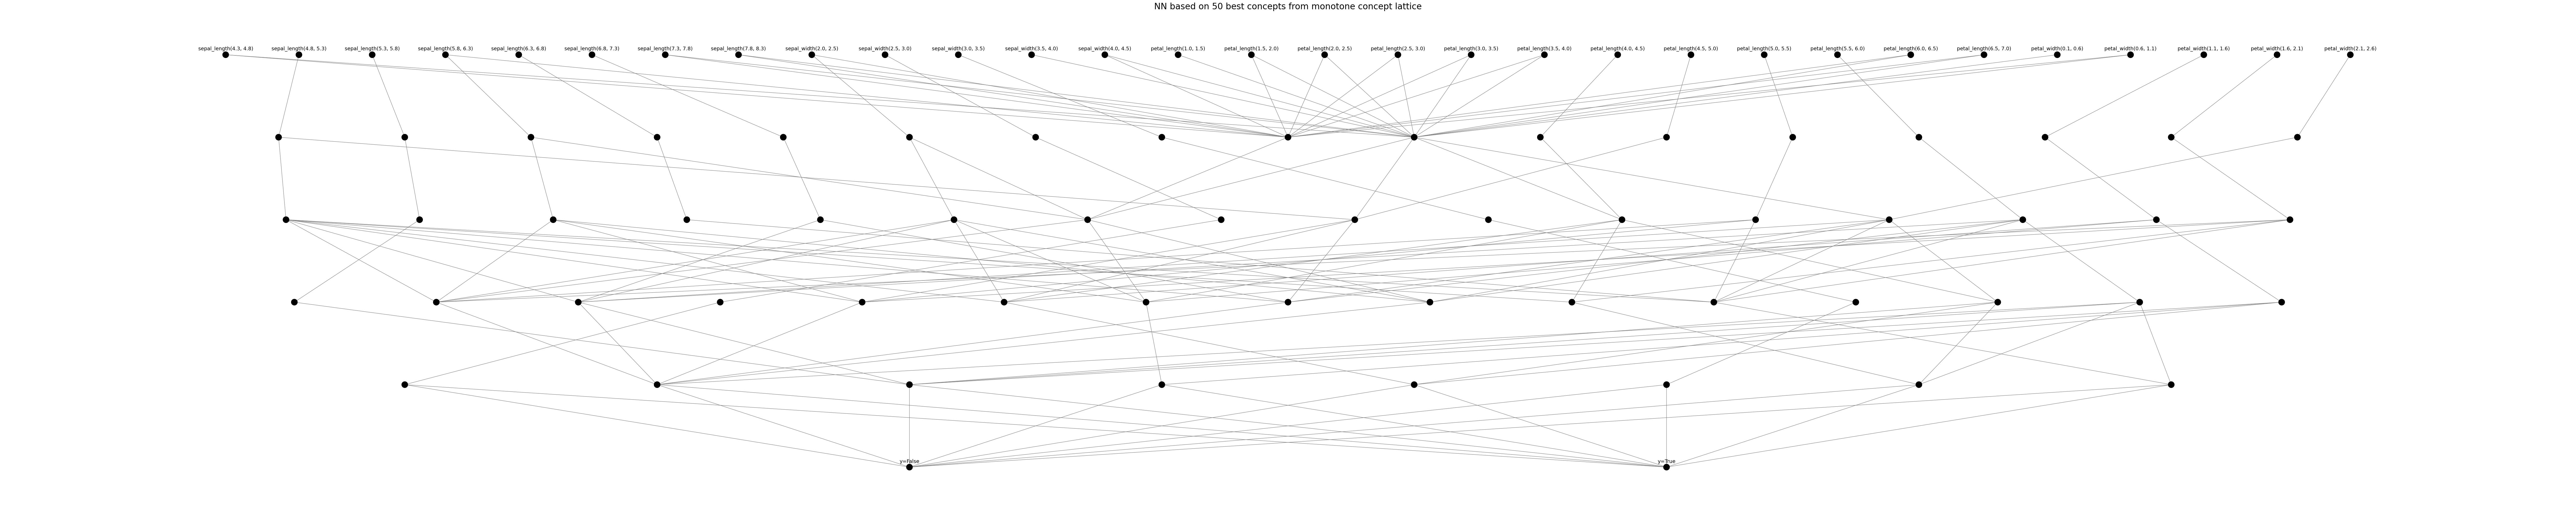

In [43]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))

vis = LineVizNx(
    node_label_font_size=14,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n',
    edge_cmap="hsv"
    )

fig, ax = plt.subplots(figsize=(100,20))

vis.draw_poset(
    cn.poset, ax=ax, edge_color='grey',
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    node_color='black',
)

plt.title(f'NN based on {50} best concepts from monotone concept lattice', loc='center', size=24)

plt.subplots_adjust()
plt.tight_layout()
plt.show()

In [44]:
cn.fit(X_train, y_train, n_epochs=50000)


In [46]:
print('Class predictions \n', cn.predict(X_test).numpy().astype(bool))
print('True classes \n', y_test.values)

Class predictions 
 [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False]
True classes 
 [False False  True False  True False  True False False False False False
 False False False  True False False  True  True False False  True  True
 False  True  True False False  True False False  True False False False
  True False False False False  True False  True  True]


Now fit the network

In [47]:
print("F1 score =", f1_score(y_test.values, cn.predict(X_test).numpy()))


F1 score = 0.0


To obtain the prediction

In [48]:
edge_weights = cn.edge_weights_from_network()

/usr/local/lib/python3.10/dist-packages/sparselinear/sparselinear.py:301: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:605.)
  weight = torch.sparse.FloatTensor(self.indices, self.weights, (self.out_features, self.in_features))


Let us look at the fitted weights of edges

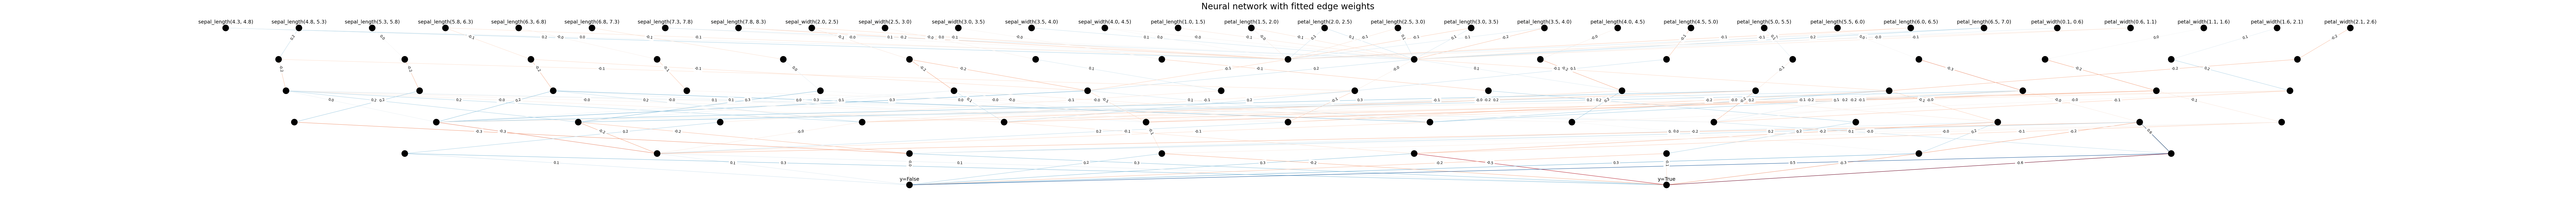

In [51]:
import networkx as nx
fig, ax = plt.subplots(figsize=(100,8))

vis.draw_poset(
    cn.poset, ax=ax, node_color='black',
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    edge_color=[edge_weights[edge] for edge in cn.poset.to_networkx().edges],
    edge_cmap=plt.cm.RdBu,
)
nx.draw_networkx_edge_labels(cn.poset.to_networkx(), vis.mover.pos, {k: f"{v:.1f}" for k,v in edge_weights.items()}, label_pos=0.7)

plt.title('Neural network with fitted edge weights', size=24, loc='center')
plt.tight_layout()
plt.subplots_adjust()
# plt.savefig('fitted_network.png')
plt.show()


# **Employee DataSet**

In [52]:
df = pd.read_csv('/content/sample_data/Employee.csv')
df.head()

Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0  Bachelors         2017  Bangalore            3   34    Male          No   
1  Bachelors         2013       Pune            1   28  Female          No   
2  Bachelors         2014  New Delhi            3   38  Female          No   
3    Masters         2016  Bangalore            3   27    Male          No   
4    Masters         2017       Pune            3   24    Male         Yes   

   ExperienceInCurrentDomain  LeaveOrNot  
0                          0           0  
1                          3           1  
2                          2           0  
3                          5           1  
4                          2           1

In [78]:
import pandas as pd

# Бинаризация категориальных признаков с помощью One-Hot Encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Бинаризация числовых признаков по порогу
numerical_cols = ['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain']
threshold = df[numerical_cols].mean()  # Порог - среднее значение по каждому числовому признаку

for col in numerical_cols:
    df_encoded[col + '_bin'] = (df[col] > threshold[col])

# Преобразование значений 0 и 1 в True и False
df_encoded = df_encoded.astype(bool)

# Нумерация строк в формате "1_emp"
df_encoded.reset_index(drop=True, inplace=True)
df_encoded.index = 'emp' + (df_encoded.index + 1).astype(str)

df_encoded

JoiningYear  PaymentTier   Age  ExperienceInCurrentDomain  LeaveOrNot  \
emp1         True         True  True                      False       False   
emp2         True         True  True                       True        True   
emp3         True         True  True                       True       False   
emp4         True         True  True                       True        True   

      Education_Masters  City_New Delhi  City_Pune  Gender_Male  \
emp1              False           False      False         True   
emp2              False           False       True        False   
emp3              False            True      False        False   
emp4               True           False      False         True   

      JoiningYear_bin  PaymentTier_bin  Age_bin  ExperienceInCurrentDomain_bin  
emp1             True             True     True                          False  
emp2            False            False    False                           True  
emp3            False             True     True                          False  
emp4             True             True    False                           True

In [79]:
y_feat = 'ExperienceInCurrentDomain_bin'
df_train, df_test = train_test_split(df_encoded, train_size=0.7, random_state=0)
X_train, y_train = df_train.drop(y_feat, axis=1), df_train[y_feat]
X_test, y_test = df_test.drop(y_feat, axis=1), df_test[y_feat]
X_train.describe()

JoiningYear PaymentTier   Age ExperienceInCurrentDomain LeaveOrNot  \
count            2           2     2                         2          2   
unique           1           1     1                         2          2   
top           True        True  True                      True       True   
freq             2           2     2                         1          1   

       Education_Masters City_New Delhi City_Pune Gender_Male JoiningYear_bin  \
count                  2              2         2           2               2   
unique                 1              1         2           2               2   
top                False          False      True       False           False   
freq                   2              2         1           1               1   

       PaymentTier_bin Age_bin  
count                2       2  
unique               2       2  
top              False   False  
freq                 1       1

In [80]:
X_test.describe()

JoiningYear PaymentTier   Age ExperienceInCurrentDomain LeaveOrNot  \
count            2           2     2                         2          2   
unique           1           1     1                         1          2   
top           True        True  True                      True      False   
freq             2           2     2                         2          1   

       Education_Masters City_New Delhi City_Pune Gender_Male JoiningYear_bin  \
count                  2              2         2           2               2   
unique                 2              2         1           2               2   
top                False           True     False       False           False   
freq                   1              1         2           1               1   

       PaymentTier_bin Age_bin  
count                2       2  
unique               1       2  
top               True    True  
freq                 2       1

In [81]:
# Create a Formal Context from the training data
K_train = FormalContext.from_pandas(X_train)

# Print the Formal Context
K_train

FormalContext (2 objects, 12 attributes, 13 connections)
    |JoiningYear|PaymentTier|Age|ExperienceInCurrentDomain|LeaveOrNot|...|City_Pune|Gender_Male|JoiningYear_bin|PaymentTier_bin|Age_bin|
emp2|          X|          X|  X|                        X|         X|...|        X|           |               |               |       |
emp1|          X|          X|  X|                         |          |...|         |          X|              X|              X|      X|

In [82]:
L = ConceptLattice.from_context(K_train, algo = 'Sofia', is_monotone=True)
len(L)

4

In [83]:
for c in L:
    y_preds = np.zeros(K_train.n_objects)
    y_preds[list(c.extent_i)] = 1
    c.measures['f1_score'] = f1_score(y_train, y_preds)


In [84]:
concepts_count = 20
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:concepts_count])

assert len({g_i for c in L[best_concepts] for g_i in c.extent_i})==K_train.n_objects, "Selected concepts do not cover all train objects"


In [85]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))



In [86]:
vis = LineVizNx(node_label_font_size=14, node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n')

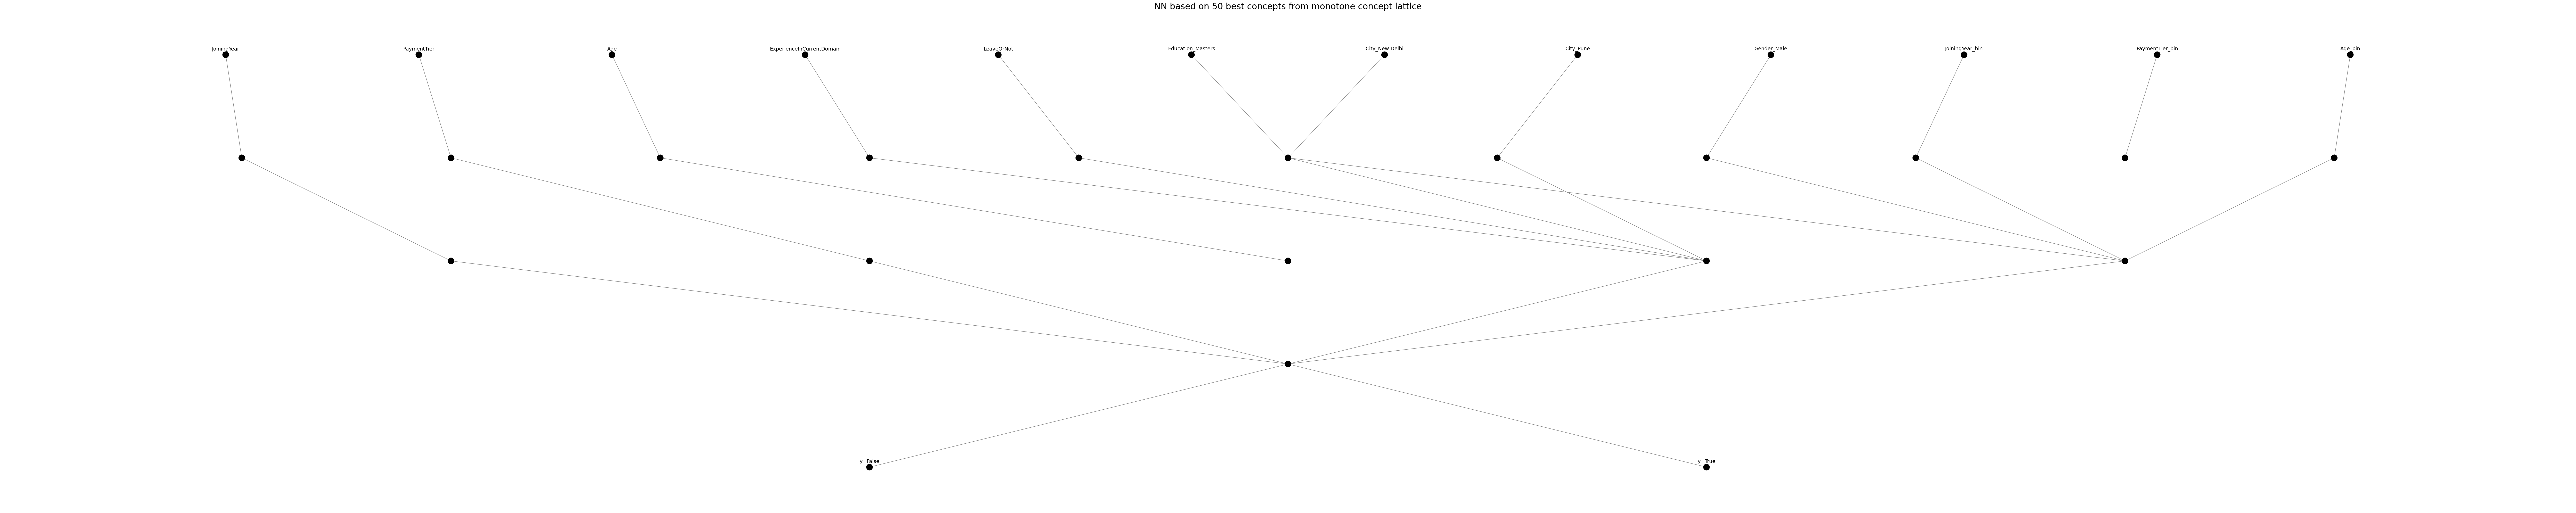

In [87]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))

vis = LineVizNx(
    node_label_font_size=14,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n',
    edge_cmap="hsv"
    )

fig, ax = plt.subplots(figsize=(100,20))

vis.draw_poset(
    cn.poset, ax=ax, edge_color='grey',
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    node_color='black',
)

plt.title(f'NN based on {50} best concepts from monotone concept lattice', loc='center', size=24)

plt.subplots_adjust()
plt.tight_layout()
plt.show()

In [88]:
cn.fit(X_train, y_train, n_epochs=50000)


In [89]:
print('Class predictions \n', cn.predict(X_test).numpy().astype(bool))
print('True classes \n', y_test.values)

Class predictions 
 [ True  True]
True classes 
 [False  True]


In [90]:
print("F1 score =", f1_score(y_test.values, cn.predict(X_test).numpy()))


F1 score = 0.6666666666666666


In [91]:
edge_weights = cn.edge_weights_from_network()

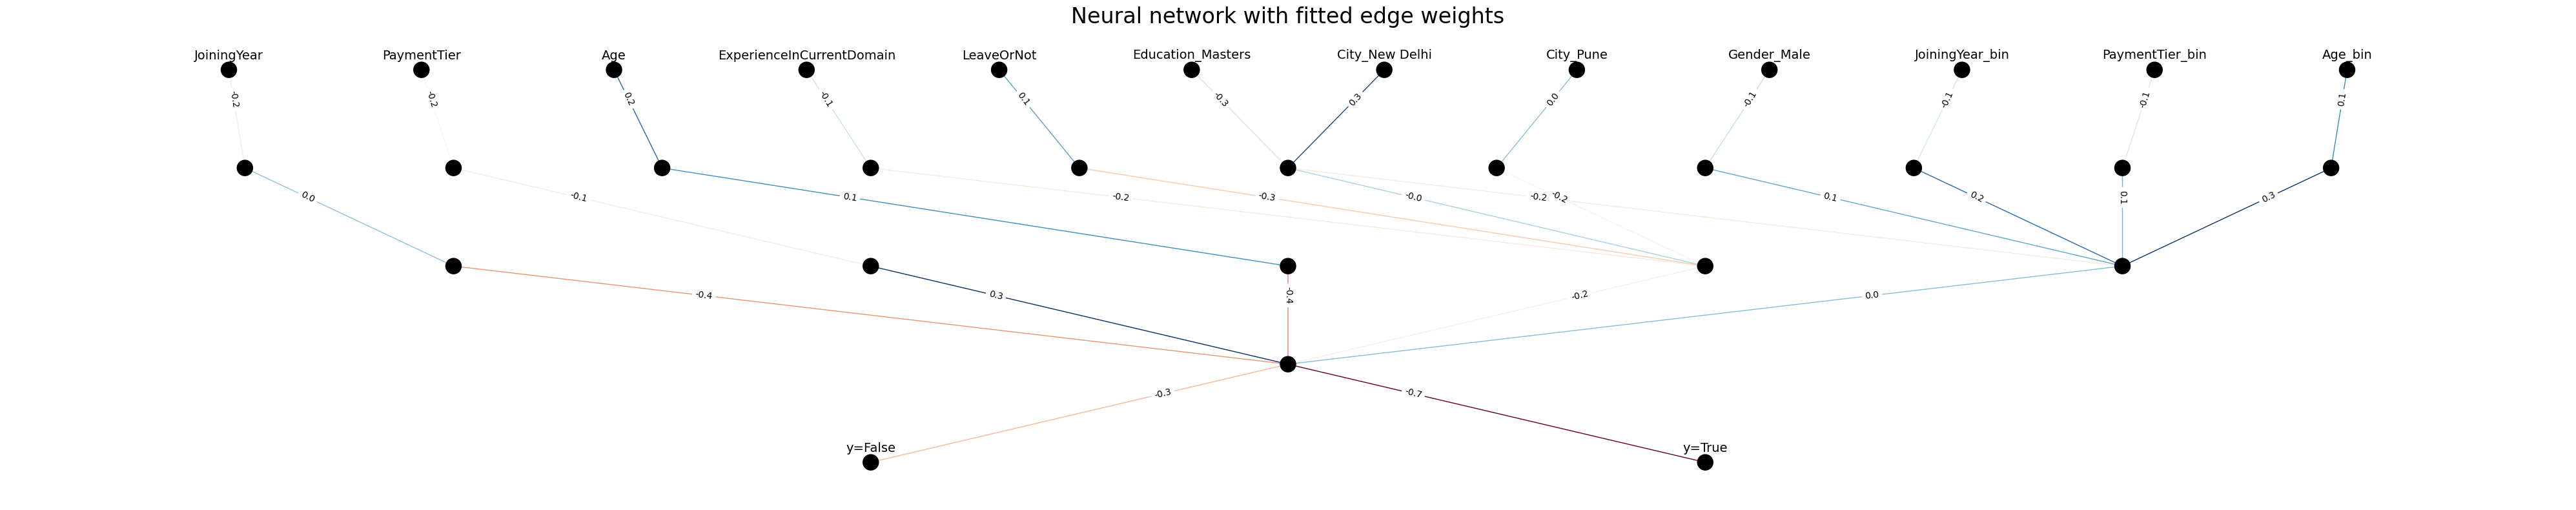

In [93]:
import networkx as nx
fig, ax = plt.subplots(figsize=(40,8))

vis.draw_poset(
    cn.poset, ax=ax, node_color='black',
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    edge_color=[edge_weights[edge] for edge in cn.poset.to_networkx().edges],
    edge_cmap=plt.cm.RdBu,
)
nx.draw_networkx_edge_labels(cn.poset.to_networkx(), vis.mover.pos, {k: f"{v:.1f}" for k,v in edge_weights.items()}, label_pos=0.7)

plt.title('Neural network with fitted edge weights', size=24, loc='center')
plt.tight_layout()
plt.subplots_adjust()
# plt.savefig('fitted_network.png')
plt.show()


# Water_potability DataSet

In [182]:
df1 = pd.read_csv('/content/sample_data/water_potability.csv')
df1.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [183]:
import pandas as pd


# Создание копии исходного DataFrame для бинаризации
binary_df1 = df1.copy()

# Бинаризация с разделением каждого числового столбца на 4 столбца
for column in binary_df1.columns[:-1]:  # Проходим по всем столбцам, кроме последнего (Potability)
    # Разбиение столбца на 4 столбца
    cut_result = pd.cut(binary_df1[column], bins=4, labels=False)
    # Создание новых столбцов на основе разделения исходного столбца
    for i in range(4):
        binary_df1[f"{column}_part_{i+1}"] = (cut_result == i).astype(int)

# Удаление исходных столбцов после разделения
binary_df1.drop(columns=df1.columns[:-1], inplace=True)

# Добавление пользовательской нумерации строк в формате 'wat1', 'wat2', 'wat3' и т.д.
binary_df1 = binary_df1.rename(index=lambda x: f'wat{x + 1}')


binary_df1.head()



Potability  ph_part_1  ph_part_2  ph_part_3  ph_part_4  Hardness_part_1  \
wat1           0          0          0          0          0                0   
wat2           0          0          1          0          0                0   
wat3           0          0          0          1          0                0   
wat4           0          0          0          1          0                0   
wat5           0          0          0          1          0                0   

      Hardness_part_2  Hardness_part_3  Hardness_part_4  Solids_part_1  ...  \
wat1                0                1                0              0  ...   
wat2                1                0                0              0  ...   
wat3                0                1                0              0  ...   
wat4                0                1                0              0  ...   
wat5                1                0                0              0  ...   

      Organic_carbon_part_3  Organic_carbon_part_4  Trihalomethanes_part_1  \
wat1                      0                      0                       0   
wat2                      0                      0                       0   
wat3                      1                      0                       0   
wat4                      1                      0                       0   
wat5                      0                      0                       0   

      Trihalomethanes_part_2  Trihalomethanes_part_3  Trihalomethanes_part_4  \
wat1                       0                       1                       0   
wat2                       1                       0                       0   
wat3                       0                       1                       0   
wat4                       0                       0                       1   
wat5                       1                       0                       0   

      Turbidity_part_1  Turbidity_part_2  Turbidity_part_3  Turbidity_part_4  
wat1                 0                 1                 0                 0  
wat2                 0                 0                 1                 0  
wat3                 0                 1                 0                 0  
wat4                 0                 0                 1                 0  
wat5                 0                 1                 0                 0  

[5 rows x 37 columns]

In [184]:
# Разделение данных на обучающий и тестовый наборы
df_train, df_test = train_test_split(binary_df1, train_size=0.7, random_state=0)

# Разделение предикторов (X) и целевой переменной (y)
X_train, y_train = df_train.drop(y_feat, axis=1), df_train[y_feat]
X_test, y_test = df_test.drop(y_feat, axis=1), df_test[y_feat]

# Преобразование предикторов (X_train и X_test) в булево
X_train = X_train.astype(bool)
X_test = X_test.astype(bool)

# Отображение описательной статистики для X_train
X_train.describe()

ph_part_1 ph_part_2 ph_part_3 ph_part_4 Hardness_part_1  \
count       2293      2293      2293      2293            2293   
unique         2         2         2         2               2   
top        False     False     False     False           False   
freq        2270      1360      1337      2255            2268   

       Hardness_part_2 Hardness_part_3 Hardness_part_4 Solids_part_1  \
count             2293            2293            2293          2293   
unique               2               2               2             2   
top              False            True           False         False   
freq              1524            1406            2200          1713   

       Solids_part_2  ... Organic_carbon_part_3 Organic_carbon_part_4  \
count           2293  ...                  2293                  2293   
unique             2  ...                     2                     2   
top             True  ...                 False                 False   
freq            1365  ...                  1428                  2261   

       Trihalomethanes_part_1 Trihalomethanes_part_2 Trihalomethanes_part_3  \
count                    2293                   2293                   2293   
unique                      2                      2                      2   
top                     False                  False                   True   
freq                     2257                   1485                   1233   

       Trihalomethanes_part_4 Turbidity_part_1 Turbidity_part_2  \
count                    2293             2293             2293   
unique                      2                2                2   
top                     False            False             True   
freq                     2194             2157             1147   

       Turbidity_part_3 Turbidity_part_4  
count              2293             2293  
unique                2                2  
top               False            False  
freq               1356             2220  

[4 rows x 36 columns]

In [185]:
X_test.describe()

ph_part_1 ph_part_2 ph_part_3 ph_part_4 Hardness_part_1  \
count        983       983       983       983             983   
unique         2         2         2         2               2   
top        False     False     False     False           False   
freq         972       582       575       968             967   

       Hardness_part_2 Hardness_part_3 Hardness_part_4 Solids_part_1  \
count              983             983             983           983   
unique               2               2               2             2   
top              False            True           False         False   
freq               652             595             942           755   

       Solids_part_2  ... Organic_carbon_part_3 Organic_carbon_part_4  \
count            983  ...                   983                   983   
unique             2  ...                     2                     2   
top             True  ...                 False                 False   
freq             585  ...                   640                   973   

       Trihalomethanes_part_1 Trihalomethanes_part_2 Trihalomethanes_part_3  \
count                     983                    983                    983   
unique                      2                      2                      2   
top                     False                  False                   True   
freq                      968                    620                    526   

       Trihalomethanes_part_4 Turbidity_part_1 Turbidity_part_2  \
count                     983              983              983   
unique                      2                2                2   
top                     False            False            False   
freq                      949              916              498   

       Turbidity_part_3 Turbidity_part_4  
count               983              983  
unique                2                2  
top               False            False  
freq                584              951  

[4 rows x 36 columns]

In [186]:
# Create a Formal Context from the training data
K_train = FormalContext.from_pandas(X_train)

# Print the Formal Context
K_train

FormalContext (2293 objects, 36 attributes, 19637 connections)
       |ph_part_1|ph_part_2|ph_part_3|ph_part_4|Hardness_part_1|...|Trihalomethanes_part_4|Turbidity_part_1|Turbidity_part_2|Turbidity_part_3|Turbidity_part_4|
wat907 |         |         |         |         |               |...|                      |                |               X|                |                |
wat2999|         |         |        X|         |               |...|                      |                |               X|                |                |
wat1819|         |         |        X|         |               |...|                      |                |                |               X|                |
wat1043|         |        X|         |         |               |...|                      |                |                |                |               X|
wat839 |         |         |         |         |               |...|                      |                |                |            

In [187]:
L = ConceptLattice.from_context(K_train, algo = 'Sofia', is_monotone=True)
len(L)

102

In [188]:
for c in L:
    y_preds = np.zeros(K_train.n_objects)
    y_preds[list(c.extent_i)] = 1
    c.measures['f1_score'] = f1_score(y_train, y_preds)

In [189]:
concepts_count = 100
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:concepts_count])


assert len({g_i for c in L[best_concepts] for g_i in c.extent_i}) == K_train.n_objects, "Selected concepts do not cover all train objects"


In [190]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))



In [191]:
vis = LineVizNx(node_label_font_size=14, node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n')

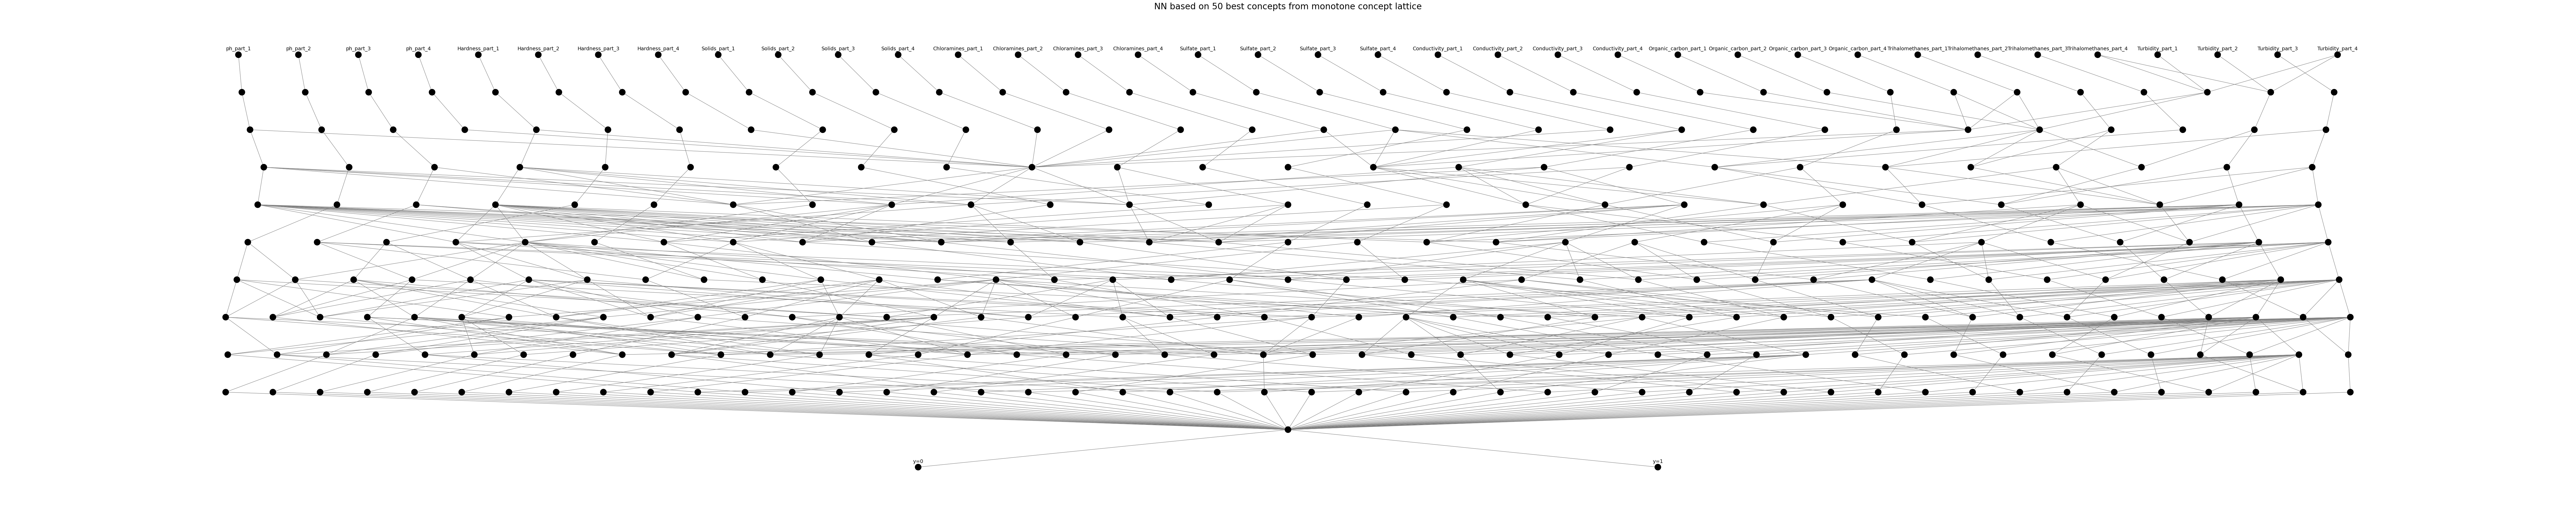

In [192]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))

vis = LineVizNx(
    node_label_font_size=14,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n',
    edge_cmap="hsv"
    )

fig, ax = plt.subplots(figsize=(100,20))

vis.draw_poset(
    cn.poset, ax=ax, edge_color='grey',
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    node_color='black',
)

plt.title(f'NN based on {50} best concepts from monotone concept lattice', loc='center', size=24)

plt.subplots_adjust()
plt.tight_layout()
plt.show()

In [202]:
cn.fit(X_train, y_train, n_epochs=500)


In [203]:
print('Class predictions \n', cn.predict(X_test).numpy().astype(bool))
print('True classes \n', y_test.values)

Class predictions 
 [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False 

In [204]:
print("F1 score =", f1_score(y_test.values, cn.predict(X_test).numpy()))


F1 score = 0.0


In [205]:
edge_weights = cn.edge_weights_from_network()

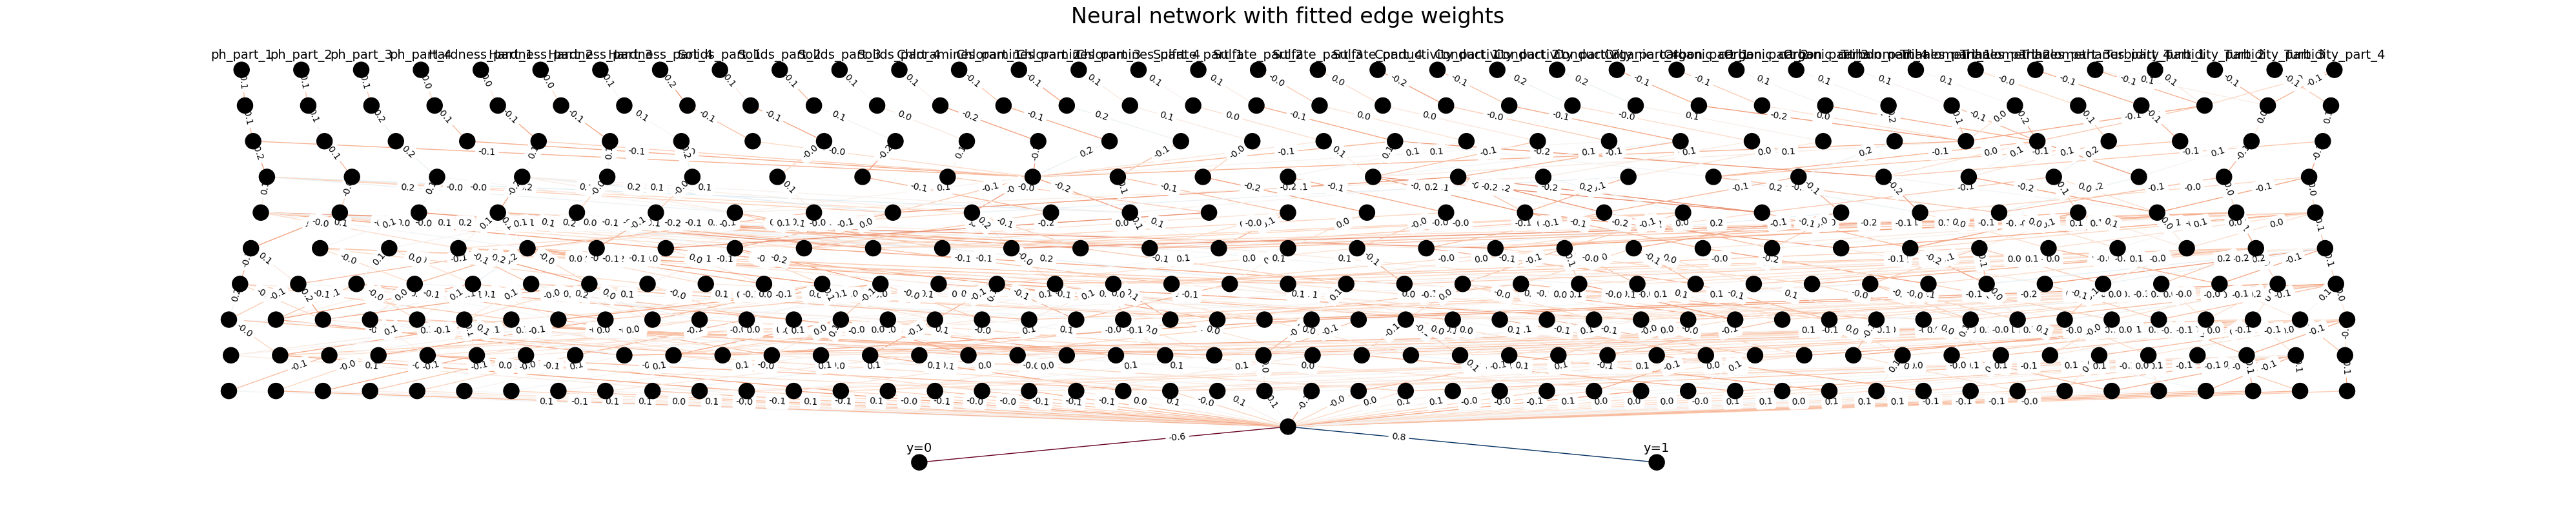

In [206]:
import networkx as nx
fig, ax = plt.subplots(figsize=(40,8))

vis.draw_poset(
    cn.poset, ax=ax, node_color='black',
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    edge_color=[edge_weights[edge] for edge in cn.poset.to_networkx().edges],
    edge_cmap=plt.cm.RdBu,
)
nx.draw_networkx_edge_labels(cn.poset.to_networkx(), vis.mover.pos, {k: f"{v:.1f}" for k,v in edge_weights.items()}, label_pos=0.7)

plt.title('Neural network with fitted edge weights', size=24, loc='center')
plt.tight_layout()
plt.subplots_adjust()
# plt.savefig('fitted_network.png')
plt.show()
